In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
ww_df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx', index_col=None, header=0)
ww_df.rename(columns={'https://www.ecdc.europa.eu/en/novel-coronavirus-china/sources-updated': 'date',}, inplace=True)
ww_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13623 entries, 0 to 13622
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  13623 non-null  datetime64[ns]
 1   day                      13623 non-null  int64         
 2   month                    13623 non-null  int64         
 3   year                     13623 non-null  int64         
 4   cases                    13623 non-null  int64         
 5   deaths                   13623 non-null  int64         
 6   countriesAndTerritories  13623 non-null  object        
 7   geoId                    13578 non-null  object        
 8   countryterritoryCode     13471 non-null  object        
 9   popData2018              13497 non-null  float64       
 10  continentExp             13623 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [3]:
fr_de_df = ww_df[(ww_df['countriesAndTerritories']=="France") | (ww_df['countriesAndTerritories']=="Germany")]
fr_de_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4483 to 4968
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  240 non-null    datetime64[ns]
 1   day                      240 non-null    int64         
 2   month                    240 non-null    int64         
 3   year                     240 non-null    int64         
 4   cases                    240 non-null    int64         
 5   deaths                   240 non-null    int64         
 6   countriesAndTerritories  240 non-null    object        
 7   geoId                    240 non-null    object        
 8   countryterritoryCode     240 non-null    object        
 9   popData2018              240 non-null    float64       
 10  continentExp             240 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.5+ KB


In [4]:
fr_de_df = fr_de_df.drop(fr_de_df.columns[[1, 2, 3, 7, 8, 9, 10]], axis='columns')
fr_de_df['countriesAndTerritories'] = fr_de_df['countriesAndTerritories'].astype('category')
fr_de_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4483 to 4968
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  240 non-null    datetime64[ns]
 1   cases                    240 non-null    int64         
 2   deaths                   240 non-null    int64         
 3   countriesAndTerritories  240 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 7.8 KB


In [5]:
fr_de_df = fr_de_df.reset_index(drop=True)
fr_de_df.head()

dateRep  cases  deaths countriesAndTerritories
0 2020-04-28   3764     437                  France
1 2020-04-27    461     242                  France
2 2020-04-26   1537     369                  France
3 2020-04-25   1773     389                  France
4 2020-04-24   1653     516                  France

In [6]:
cases=fr_de_df['cases']
deaths=fr_de_df['deaths']
fr_de_df = fr_de_df.assign(cfr=pd.Series(np.divide(deaths,cases)))
fr_de_df.head()

dateRep  cases  deaths countriesAndTerritories       cfr
0 2020-04-28   3764     437                  France  0.116100
1 2020-04-27    461     242                  France  0.524946
2 2020-04-26   1537     369                  France  0.240078
3 2020-04-25   1773     389                  France  0.219402
4 2020-04-24   1653     516                  France  0.312160

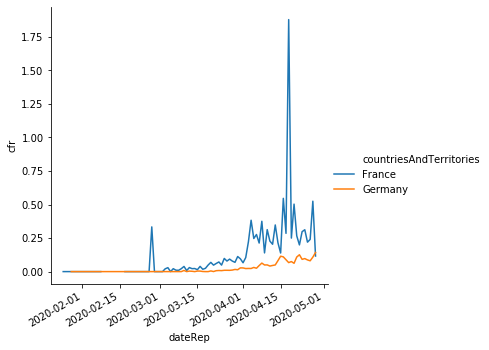

In [7]:
g=sns.relplot(x='dateRep', y='cfr', hue='countriesAndTerritories', kind='line', data=fr_de_df)
g.fig.autofmt_xdate()